In [27]:
#Realizamos imports de librerias
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split

##### Descarga de los datos

In [28]:
!wget https://raw.githubusercontent.com/andres-calvo/modelos-1/master/train.csv -O train.csv

"wget" no se reconoce como un comando interno o externo,
programa o archivo por lotes ejecutable.


#### Carga y limpieza de datos

In [29]:
train=pd.read_csv('train.csv')
train.drop('policy_id', axis=1, inplace=True)

In [30]:
#Transformamos los datos de las variables categóricas a una representación numérica
for columns in train.columns:
    if dict(train.dtypes)[columns] == 'object':
        label_encoder = preprocessing.LabelEncoder()
        train[columns] = label_encoder.fit_transform(train[columns])


# Determinar cuántos valores nulos quieres en cada columna
num_rows = train.shape[0]
num_nulls = int(0.05 * num_rows)  # 5% de los valores nulos

# Crear una lista aleatoria de índices de filas
null_rows = np.random.choice(num_rows, size=num_nulls, replace=False)
# Columnas donde simularemos los nulos
null_columns=['policy_tenure','area_cluster','age_of_car']
# Asignar valores nulos a las celdas correspondientes
train.loc[null_rows, null_columns] = np.nan

train.head(10)

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,...,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,0.0,4990,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
1,0.672619,0.02,0.375000,11.0,27003,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
2,0.841110,0.02,0.384615,15.0,4076,1,0,0,0,5,...,0,0,0,1,0,0,0,1,0,0
3,NaN,NaN,0.432692,NaN,21622,1,3,3,2,0,...,1,1,1,1,1,1,1,1,2,0
4,0.596403,0.11,0.634615,17.0,34738,2,0,4,2,8,...,0,1,1,1,0,1,1,1,2,0
5,1.018709,0.07,0.519231,18.0,13051,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
6,0.097992,0.16,0.403846,19.0,6112,4,2,6,1,3,...,0,1,1,1,0,0,1,1,5,0
7,0.509085,0.14,0.423077,20.0,8794,1,2,7,2,0,...,1,1,1,1,1,1,1,1,2,0
8,0.282394,0.07,0.298077,19.0,6112,3,4,5,1,4,...,1,1,1,1,1,0,1,1,3,0
9,0.566255,0.04,0.442308,21.0,17804,1,2,8,2,0,...,1,1,1,1,1,1,1,1,0,0


In [31]:
#Imprimimos la cantidad de NaN
num_nans = train.isna().sum()
print(num_nans)

policy_tenure                       2929
age_of_car                          2929
age_of_policyholder                    0
area_cluster                        2929
population_density                     0
make                                   0
segment                                0
model                                  0
fuel_type                              0
max_torque                             0
max_power                              0
engine_type                            0
airbags                                0
is_esc                                 0
is_adjustable_steering                 0
is_tpms                                0
is_parking_sensors                     0
is_parking_camera                      0
rear_brakes_type                       0
displacement                           0
cylinder                               0
transmission_type                      0
gear_box                               0
steering_type                          0
turning_radius  

#### Modelado

In [32]:
#Eliminamos las filas con NaN para poder utilizar un modelo de regresión logística
train.dropna(inplace=True)

#Desarrollo modelo regresión logística

#Inicialización.
modelLR = LogisticRegression()

#División de datos en conjunto de evaluación y conjunto de entrenamiento
X_train, X_test, y_train, y_test = train_test_split(train.drop(['is_claim'], axis=1), train['is_claim'], test_size=0.3, shuffle=True)


modelLR.fit(X_train, y_train)

LogisticRegression()

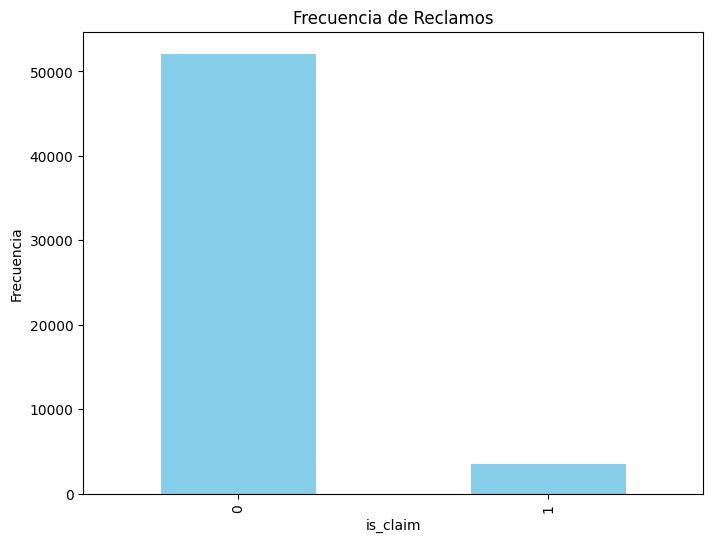

In [36]:
plt.figure(figsize=(8, 6))
train['is_claim'].value_counts().plot(kind='bar', color='skyblue')
plt.title("Frecuencia de Reclamos")
plt.xlabel('is_claim')
plt.ylabel("Frecuencia")
plt.show()


#### Predicciones y accuracy score

In [34]:
predictions = modelLR.predict(X_test)
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [35]:
train_accuracy= accuracy_score(y_test,predictions)

print('Accuracy')
print( 100*train_accuracy)


Accuracy
93.7002215701539
